# Inicio de el proyecto

# Paso1: Importar Librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Paso 2: Cargar dataset

In [3]:
df = pd.read_csv("dataset_elpino.csv", sep=";", encoding="utf-8", header=None, skiprows=1)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,A41.8 - Otras septicemias especificadas ...,B37.6 - Endocarditis debida a candida (I39.8*...,"I39.8 - Endocarditis, válvula no especificada...",N10 - Nefritis tubulointersticial aguda ...,B96.1 - Klebsiella pneumoniae [K. pneumoniae]...,L89.9 - Úlcera de decúbito y area de presión ...,L08.9 - Infección local de la piel y del teji...,B96.2 - Escherichia coli [E. coli] como causa...,A41.5 - Sepsis por otros organnismos Gram neg...,J86.9 - Piotórax sin fístula ...,...,99.84 - AISLAMIENTO ...,88.72 - ECOCARDIOGRAFIA ...,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULT...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO ...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA...,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado ...",J12.8 - Neumonía debida a otros virus ...,R06.0 - Disnea ...,R05 - Tos ...,"R50.9 - Fiebre, no especificada ...",Z29.0 - Aislamiento ...,Z01.7 - Examen de laboratorio ...,"J96.00 - Insuficiencia respiratoria aguda, Ti...",J94.2 - Hemotórax ...,J92.9 - Paquipleuritis sin asbestosis ...,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO ...,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULT...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO ...,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,96.59 - IRRIGACION HERIDA OTRA ...,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIO...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONG...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico ...,R57.1 - Choque hipovolémico ...,J80 - Síndrome de dificultad respiratoria del...,Y95 - Afección nosocomial ...,J15.0 - Neumonía debida a Klebsiella pneumoni...,U82.2 - Resistencia a Betalactamasas de ampli...,B95.6 - Staphylococcus aureus como causa de e...,B96.8 - Otros agentes bacterianos especificad...,B37.1 - Candidiasis pulmonar ...,...,99.84 - AISLAMIENTO ...,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA...,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y ...,99.26 - INYECCION TRANQUILIZANTE ...,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRUR...,89.66 - GASOMETRIA VENA ...,89.65 - GASOMETRIA ARTERIA ...,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONG...
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo ...,"N18.5 - Enfermedad renal crónica, estadio 5 ...",D64.9 - Anemia de tipo no especificado ...,E87.5 - Hiperpotasemia ...,E87.2 - Acidosis ...,J81 - Edema pulmonar ...,N17.8 - Otras insuficiencias renales agudas ...,J44.9 - Enfermedad pulmonar obstructiva cróni...,R41.0 - Desorientación no especificada ...,...,57.94 - SONDAJE URINARIO PERMANENTE ...,00.13 - INYECCION NESIRITIDE ...,00.17 - INFUSON AGENTE VASOPRESOR ...,99.04 - TRANSFUSION CONCENTRADO HEMATIES ...,99.18 - INYECCION ELECTROLITO ...,99.21 - INYECCION ANTIBIOTICO ...,99.23 - INYECCION ESTEROIDE ...,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA S...
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis,...",S31.1 - Herida de la pared abdominal ...,S36.80 - Traumatismo de otros órganos intraab...,W31.62 - Contacto traumático con otras maquin...,"J96.09 - Insuficiencia respiratoria aguda, Ti...",J15.0 - Neumonía debida a Klebsiella pneumoni...,U82.2 - Resistencia a Betalactamasas de ampli...,"U07.1 - COVID-19, virus identificado ...","N39.0 - Infección de vías urinarias, sitio no...",...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO ...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,93.90 - RESPIRACION PRESION POSITIVA CONTINUA...,99.15 - INFUSION PARENTERAL SUSTANCIA NUTRITI...,96.59 - IRRIGACION HERIDA OTRA ...,45.13 - ESOFAGOGASTRODUODENOSCOPIA [EGD] ...,30,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA S...


In [4]:
# Paso 3: Asignar nombres de columnas (ajústalos si es necesario)
column_names = [f"Diagnostico{i+1}" for i in range(35)] + \
               [f"Procedimiento{i+1}" for i in range(30)] + \
               ["Edad", "Sexo", "GRD"]
df.columns = column_names
df.head()


,Diagnostico1,Diagnostico2,Diagnostico3,Diagnostico4,Diagnostico5,Diagnostico6,Diagnostico7,Diagnostico8,Diagnostico9,Diagnostico10,...,Procedimiento24,Procedimiento25,Procedimiento26,Procedimiento27,Procedimiento28,Procedimiento29,Procedimiento30,Edad,Sexo,GRD
0,A41.8 - Otras septicemias especificadas ...,B37.6 - Endocarditis debida a candida (I39.8*...,"I39.8 - Endocarditis, válvula no especificada...",N10 - Nefritis tubulointersticial aguda ...,B96.1 - Klebsiella pneumoniae [K. pneumoniae]...,L89.9 - Úlcera de decúbito y area de presión ...,L08.9 - Infección local de la piel y del teji...,B96.2 - Escherichia coli [E. coli] como causa...,A41.5 - Sepsis por otros organnismos Gram neg...,J86.9 - Piotórax sin fístula ...,...,99.84 - AISLAMIENTO ...,88.72 - ECOCARDIOGRAFIA ...,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULT...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO ...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA...,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado ...",J12.8 - Neumonía debida a otros virus ...,R06.0 - Disnea ...,R05 - Tos ...,"R50.9 - Fiebre, no especificada ...",Z29.0 - Aislamiento ...,Z01.7 - Examen de laboratorio ...,"J96.00 - Insuficiencia respiratoria aguda, Ti...",J94.2 - Hemotórax ...,J92.9 - Paquipleuritis sin asbestosis ...,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO ...,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULT...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO ...,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,96.59 - IRRIGACION HERIDA OTRA ...,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIO...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONG...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico ...,R57.1 - Choque hipovolémico ...,J80 - Síndrome de dificultad respiratoria del...,Y95 - Afección nosocomial ...,J15.0 - Neumonía debida a Klebsiella pneumoni...,U82.2 - Resistencia a Betalactamasas de ampli...,B95.6 - Staphylococcus aureus como causa de e...,B96.8 - Otros agentes bacterianos especificad...,B37.1 - Candidiasis pulmonar ...,...,99.84 - AISLAMIENTO ...,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA...,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y ...,99.26 - INYECCION TRANQUILIZANTE ...,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRUR...,89.66 - GASOMETRIA VENA ...,89.65 - GASOMETRIA ARTERIA ...,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONG...
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo ...,"N18.5 - Enfermedad renal crónica, estadio 5 ...",D64.9 - Anemia de tipo no especificado ...,E87.5 - Hiperpotasemia ...,E87.2 - Acidosis ...,J81 - Edema pulmonar ...,N17.8 - Otras insuficiencias renales agudas ...,J44.9 - Enfermedad pulmonar obstructiva cróni...,R41.0 - Desorientación no especificada ...,...,57.94 - SONDAJE URINARIO PERMANENTE ...,00.13 - INYECCION NESIRITIDE ...,00.17 - INFUSON AGENTE VASOPRESOR ...,99.04 - TRANSFUSION CONCENTRADO HEMATIES ...,99.18 - INYECCION ELECTROLITO ...,99.21 - INYECCION ANTIBIOTICO ...,99.23 - INYECCION ESTEROIDE ...,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA S...
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis,...",S31.1 - Herida de la pared abdominal ...,S36.80 - Traumatismo de otros órganos intraab...,W31.62 - Contacto traumático con otras maquin...,"J96.09 - Insuficiencia respiratoria aguda, Ti...",J15.0 - Neumonía debida a Klebsiella pneumoni...,U82.2 - Resistencia a Betalactamasas de ampli...,"U07.1 - COVID-19, virus identificado ...","N39.0 - Infección de vías urinarias, sitio no...",...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO ...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR...,93.90 - RESPIRACION PRESION POSITIVA CONTINUA...,99.15 - INFUSION PARENTERAL SUSTANCIA NUTRITI...,96.59 - IRRIGACION HERIDA OTRA .

In [5]:
# Paso 4: Preprocesar sexo (convertir a binario)
df["Sexo"] = df["Sexo"].map({"Hombre": 1, "Mujer": 0})


In [6]:
# Paso 5: Extraer solo el código de diagnóstico y procedimiento (antes del " - ")
def extraer_codigo(valor):
    if isinstance(valor, str) and "-" in valor:
        return valor.split("-")[0].strip()
    return np.nan

for col in [f"Diagnostico{i+1}" for i in range(35)] + [f"Procedimiento{i+1}" for i in range(30)]:
    df[col] = df[col].apply(extraer_codigo)


In [7]:
# Paso 6: Crear lista de códigos por paciente (diagnósticos + procedimientos)
df["codigos"] = df[[f"Diagnostico{i+1}" for i in range(35)] +
                   [f"Procedimiento{i+1}" for i in range(30)]].values.tolist()


In [8]:
# Paso 7: Codificación binaria de los códigos con MultiLabelBinarizer
# Asegurar que todos los valores de df["codigos"] sean listas sin valores nulos
df["codigos"] = df["codigos"].apply(lambda x: [c for c in x if isinstance(c, str)] if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
X_codes = mlb.fit_transform(df["codigos"])


In [9]:
# Paso 8: Combinar con edad y sexo
X = np.hstack((X_codes, df[["Edad", "Sexo"]].values))


In [10]:
# Paso 9: Codificar GRD como clase numérica (target)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["GRD"])


In [11]:
# Paso 10: Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Paso 11: Entrenar modelo base (Random Forest)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.39      0.71      0.50        17
          10       0.18      0.44      0.26        16
          11       0.60      0.16      0.25        19
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.54      0.50      0.52        14
          23       0.00      0.00      0.00         7
          24       0.00      0.00      0.00         3
          25       0.83      1.00      0.91         5
          26       0.00      0.00      0.00         1
          27       0.60    

c:\Users\maste\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maste\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maste\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

# entrenar N-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("📊 Reporte - KNN")
print(classification_report(y_test, y_pred_knn))


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)  # Puedes ajustar la profundidad
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("📊 Reporte - Árbol de Decisión")
print(classification_report(y_test, y_pred_tree))


📊 Reporte - Árbol de Decisión
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        19
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00        14
          23       0.00      0.00      0.00         7
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         5
          26       0.00      0.00      0.00        

c:\Users\maste\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maste\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maste\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

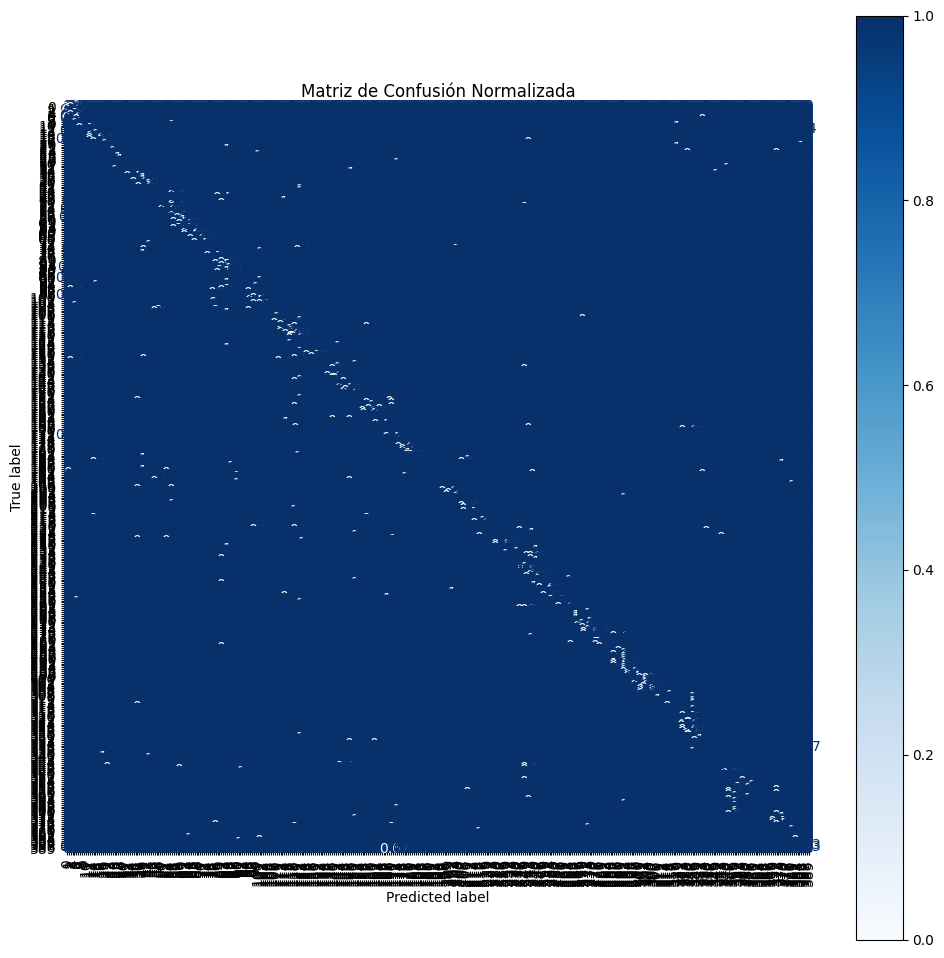

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_norm = confusion_matrix(y_test, y_pred, normalize='true')  # Por fila
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Matriz de Confusión Normalizada")
plt.show()
